In [7]:
# ライブラリのインポート
!pip install torchinfo
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
#
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
from torch import nn,optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms
from torchinfo import summary
from torch.autograd import Variable

Defaulting to user installation because normal site-packages is not writeable


In [9]:
#df = pd.read_csv("https://raw.githubusercontent.com/aweglteo/tokyo_weather_data/main/data.csv", parse_dates=True, index_col=0)
df = pd.read_csv("dataTokyo2.csv", parse_dates=True, index_col=0)
#df.to_csv('local_weather_data.csv')

In [11]:
scaler = MinMaxScaler()
#scaler = StandardScaler() <---- no good
df_scaled = scaler.fit_transform(df[['Temperature', 'Humidity', 'Precipitation', 'Sunlight', 'Wind', 'Cloud']])

In [35]:
# Divide for test and training data
df_train, df_test = train_test_split(df_scaled, test_size=0.15, shuffle=False)

window_size = 12
#window_size = 20 《---
n_data = len(df) - window_size + 1 -1

n_dim = df_train.shape[1]
n_train = len(df_train) - window_size + 1 - 1
n_test = len(df_test) - window_size + 1 - 1

# Prepare corect solution data
train = np.zeros((n_train, window_size, n_dim))
train_labels = np.zeros((n_train, n_dim))
for i in range(n_train):
    train[i] = df_train[i:i+window_size]
    train_labels[i] = df_train[i+window_size]

# Prepare test data
test = np.zeros((n_test, window_size, n_dim))
test_labels = np.zeros((n_test, n_dim))
for i in range(n_test):
    test[i] = df_test[i:i+window_size]
    test_labels[i] = df_test[i+window_size]

# Prepare training label
#train_labels =train_labels[:, 2]
train_labels =train_labels[:, 0]

In [37]:
##train = torch.tensor(train, dtype=torch.float)
##labels = torch.tensor(train_labels, dtype=torch.float)
#train = torch.tensor(train, dtype=torch.float32)
#labels = torch.tensor(train_labels, dtype=torch.float32)
#dataset = torch.utils.data.TensorDataset(train, labels)
#train_loader = DataLoader(dataset, batch_size=4, shuffle=True)  
####train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming train and train_labels are already defined
# Ensure train is a tensor with the correct dtype
if isinstance(train, torch.Tensor):
    train = train.float()  # Convert to float32 if not already
else:
    train = torch.tensor(train, dtype=torch.float32)  # Convert from other types, e.g., NumPy

# Ensure train_labels is a tensor with the correct dtype
if isinstance(train_labels, torch.Tensor):
    labels = train_labels.float()  # Convert to float32 if not already
else:
    labels = torch.tensor(train_labels, dtype=torch.float32)  # Convert from other types, e.g., NumPy

# Create TensorDataset and DataLoader
dataset = TensorDataset(train, labels)
##train_loader = DataLoader(dataset, batch_size=4, shuffle=True)
##train_loader = DataLoader(dataset, batch_size=12, shuffle=True)
train_loader = DataLoader(dataset, batch_size=24, shuffle=True)

In [39]:
# 多変量を入力して、１変数の予測結果を返すLSTNモデル.
import torch
import torch.nn as nn
from torch.autograd import Variable

class MyLSTM(nn.Module):
    def __init__(self, feature_size, hidden_dim, n_layers, batch_size):
        super(MyLSTM, self).__init__()
        self.feature_size = feature_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.batch_size = batch_size
        self.n_output = 1

        # LSTM Layer
        self.lstm = nn.LSTM(feature_size, hidden_dim, n_layers, batch_first=True)
        
        # Fully connected output layer
        self.fc = nn.Linear(hidden_dim, self.n_output)

    def init_hidden(self, batch_size):
        # Initialize hidden state and cell state as zeros
        h_0 = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.lstm.weight_ih_l0.device)
        c_0 = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.lstm.weight_ih_l0.device)
        return (h_0, c_0)

    def forward(self, x):
        batch_size = x.size(0)
        # Initialize hidden and cell states
        hidden = self.init_hidden(batch_size)
        
        # Get the LSTM outputs
        output, (hn, cn) = self.lstm(x, hidden)  # Pass the input and hidden states into the LSTM
        
        # Use the last hidden state for the fully connected layer
        hn = hn[-1]  # Take the last hidden state from the last layer
        
        # Pass the hidden state through the fully connected layer
        y = self.fc(hn)
        
        return y

feature_size  = 6
#n_hidden  = 64
#n_layers  = 1
n_hidden  = 32
n_layers  = 6
#batch_size=4
#batch_size=12
#batch_size=12
batch_size=24
#net = MyLSTM(feature_size, n_hidden, n_layers)
##net = MyLSTM(feature_size, n_hidden, n_layers)
# Initialize hidden state during training or prediction
##batch_size = 4  # or whatever batch size you're using
##hidden = net.init_hidden(batch_size)
#net.to(device)

In [15]:
summary(net)

NameError: name 'net' is not defined

In [22]:
func_loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_history = []
device = torch.device("cuda:0" if torch.cuda. is_available() else "cpu")
#epochs = 200
#epochs = 300

net.to(device)

NameError: name 'net' is not defined

In [41]:
#for i in range(epochs+1):
#    net.train()
#    tmp_loss = 0.0
#    for j, (x, t) in enumerate(train_loader):
#        x = x.to(device)
#        optimizer.zero_grad()
#        y = net(x) 
#        y = y.to('cpu')
#        loss = func_loss(y, t)
#        loss.backward()
#        optimizer.step() 
#        tmp_loss += loss.item()
#    tmp_loss /= j+1
#    loss_history.append(tmp_loss)
#    print('Epoch:', i, 'Loss_Train:', tmp_loss)
# Initialize model and move to device
#net = MyLSTM(feature_size, n_hidden, n_layers, batch_size=4)
#net.to(device)

# Training loop
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the LSTM network (assuming MyLSTM is defined)
feature_size = 6
#n_hidden = 64
n_hidden = 32
n_layers = 6
#
net = MyLSTM(feature_size, n_hidden, n_layers,batch_size)

# Set forget gate bias to 1.0  <<---original did not use ********found no use
#for name, param in net.named_parameters():
#    if 'bias' in name:
#        n = param.size(0)
#        param.data[n//4:n//2].fill_(0.01)  # Increase forget gate bias
#

# Loss function and optimizer
func_loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_history = []

# Check for available device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Training loop
#epochs = 200
epochs = 300
for i in range(epochs + 1):
    net.train()  # Set the model to training mode
    tmp_loss = 0.0
    
    for j, (x, t) in enumerate(train_loader):
        # Move data to device (CPU or GPU)
        x = x.to(device)
        t = t.to(device)

        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        y = net(x)
        y = y.to('cpu')

        # Reshape target to match the shape of y
        t = t.view(y.shape)

        # Calculate loss
        loss = func_loss(y, t)
        loss.backward()  # Backpropagation
        
        optimizer.step()  # Update the model weights

        tmp_loss += loss.item()

    # Average loss for the current epoch
    tmp_loss /= j + 1
    loss_history.append(tmp_loss)
    print(f'Epoch: {i}, Loss_Train: {tmp_loss}')

# Plot the loss history
#plt.plot(range(len(loss_history)), loss_history, label='train')
#plt.legend()
#plt.xlabel("Epochs")
#plt.ylabel("Loss")
#plt.show()

Epoch: 0, Loss_Train: 0.1250664025831681
Epoch: 1, Loss_Train: 0.05134882226299781
Epoch: 2, Loss_Train: 0.05204144213348627
Epoch: 3, Loss_Train: 0.05250633995120342
Epoch: 4, Loss_Train: 0.05222905369905325
Epoch: 5, Loss_Train: 0.04453491218961202
Epoch: 6, Loss_Train: 0.029445800715341017
Epoch: 7, Loss_Train: 0.026031328830868006
Epoch: 8, Loss_Train: 0.024495031362256177
Epoch: 9, Loss_Train: 0.02459081240858023
Epoch: 10, Loss_Train: 0.022533242035513885
Epoch: 11, Loss_Train: 0.020029855677141592
Epoch: 12, Loss_Train: 0.020072910361565076
Epoch: 13, Loss_Train: 0.01967970346315549
Epoch: 14, Loss_Train: 0.017942980003471557
Epoch: 15, Loss_Train: 0.016482744867411945
Epoch: 16, Loss_Train: 0.014608972759630818
Epoch: 17, Loss_Train: 0.014007614674763037
Epoch: 18, Loss_Train: 0.012965420547586221
Epoch: 19, Loss_Train: 0.012932872757888757
Epoch: 20, Loss_Train: 0.011293060343282727
Epoch: 21, Loss_Train: 0.010715311876713084
Epoch: 22, Loss_Train: 0.01068623260093423
Epoch: 2

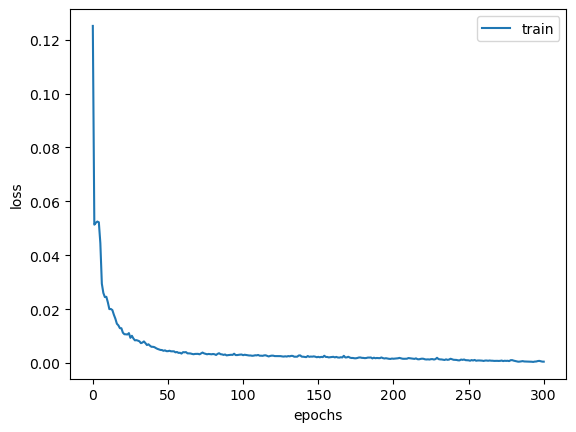

In [43]:
##################No need anymore
# 損失関数を描く

plt.plot(range(len(loss_history)), loss_history, label='train')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [45]:
#predicted_train_plot = []
#net.eval()
#
#for k in range(n_train):
#    x = torch.tensor(train[k])
#    x = x.reshape(1, window_size, feature_size)
#    x = x.to(device).float()
#    y = net(x)
#    y = y.to('cpu')
#    predicted_train_plot.append(y[0].item())
# Initialize an empty list to store predictions
predicted_train_plot = []
net.eval()  # Set the model to evaluation mode

# Loop through the training data for predictions
for k in range(n_train):
    # Ensure train[k] is a tensor
    if isinstance(train[k], torch.Tensor):
        x = train[k]
    else:
        x = torch.tensor(train[k])

    # Reshape the input and move to the correct device
    x = x.reshape(1, window_size, feature_size).to(device).float()

    # Get the model output (prediction)
    y = net(x)  # No need to pass hidden state, it's handled inside the model

    # Move the prediction back to CPU for further processing
    y = y.to('cpu')

    # Append the prediction to the list
    predicted_train_plot.append(y[0].item())

# Print the length of the predictions for debugging purposes
print(f"Length of predicted_train_plot: {len(predicted_train_plot)}")
    # Debugging: Print the prediction
#    print(f"Prediction {k}: {y[0].item()}")

# Check if predicted_train_plot contains any values
# 0print(f"Length of predicted_train_plot: {len(predicted_train_plot)}")

Length of predicted_train_plot: 620


In [265]:
print(f"Length of predicted_train_plot: {len(predicted_train_plot)}")
print(f"Length of df_test: {len(df_test)}")
print(f"Expected length: {len(df_test) - window_size}")

Length of predicted_train_plot: 514
Length of df_test: 224
Expected length: 218


In [54]:
############### no need anymore
predicted_train_plot = []
net.eval()

# Ensure the loop runs correctly for valid indices
for k in range(len(df_test) - window_size):
    x = torch.tensor(train[k]) if not isinstance(train[k], torch.Tensor) else train[k]
    x = x.reshape(1, window_size, feature_size).to(device).float()

    y = net(x)
    y = y.to('cpu')

    predicted_train_plot.append(y[0].item())

# Debugging: Print the length of the predictions
print(f"Length of predicted_train_plot: {len(predicted_train_plot)}")

TypeError: MyLSTM.forward() missing 1 required positional argument: 'hidden'

In [170]:
###############No need anymore
# Ensure df_test is a NumPy array
if isinstance(df_test, torch.Tensor):
    df_test = df_test.cpu().numpy()

# Verify the length of the actual data
print(f"Length of df_test: {len(df_test)}")
#print(f"Length of df_test[:, 2]: {len(df_test[:, 2])}")
print(f"Length of df_test[:, 0]: {len(df_test[:, 0])}")

# Calculate the expected length
expected_length = len(df_test) - window_size
print(f"Expected length of predictions: {expected_length}")

# Check lengths
assert len(predicted_train_plot) == expected_length, "Shape mismatch between test data and predictions."

# Plot the results
#plt.plot(range(len(df_test)), df_test[:, 2], label='Correct')
plt.plot(range(len(df_test)), df_test[:, 0], label='Correct')
plt.plot(range(window_size, window_size + len(predicted_train_plot)), predicted_train_plot, label='Test result')
plt.legend()
plt.show()

Length of df_test: 224
Length of df_test[:, 0]: 224
Expected length of predictions: 176


AssertionError: Shape mismatch between test data and predictions.

Sample predictions and actual values:
Index 0, Prediction: 0.6984485387802124, Actual: 0.0
Index 1, Prediction: 0.7277882695198059, Actual: 0.0
Index 2, Prediction: 0.7527235150337219, Actual: 0.0
Index 3, Prediction: 0.7251255512237549, Actual: 0.0
Index 4, Prediction: 0.6378088593482971, Actual: 0.0


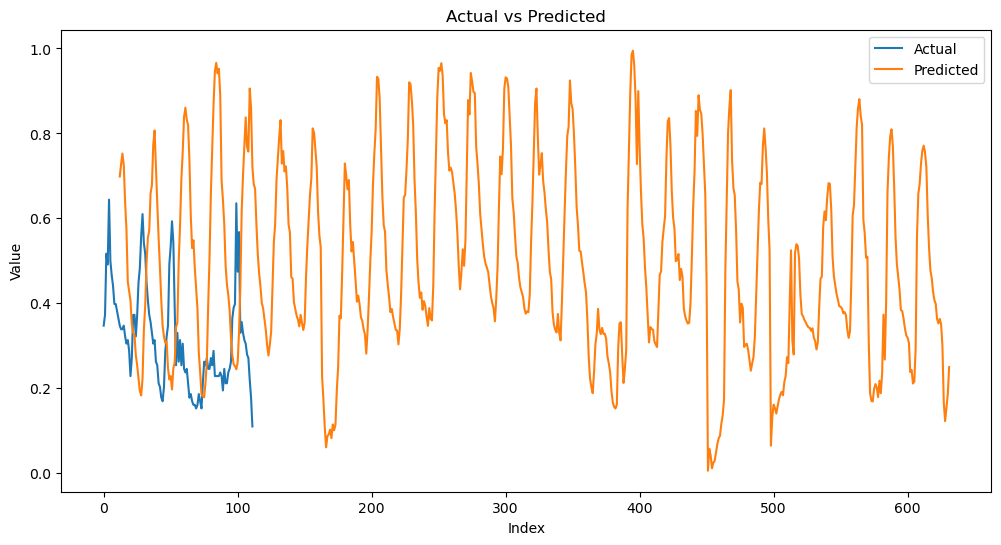

In [47]:
# Check predictions against actual values
print("Sample predictions and actual values:")
for i in range(5):
    print(f"Index {i}, Prediction: {predicted_train_plot[i]}, Actual: {df_test[i + window_size, 2]}")

# Ensure proper plotting
plt.figure(figsize=(12, 6))
#plt.plot(range(len(df_test)), df_test[:, 2], label='Actual')
plt.plot(range(len(df_test)), df_test[:, 0], label='Actual')
plt.plot(range(window_size, window_size + len(predicted_train_plot)), predicted_train_plot, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

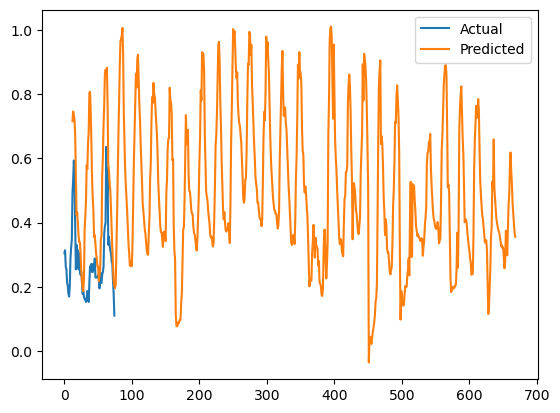

In [27]:
#plt.plot(range(len(df_test)), df_test[:, 2], label='Actual')
plt.plot(range(len(df_test)), df_test[:, 0], label='Actual')
plt.plot(range(window_size, window_size + len(predicted_train_plot)), predicted_train_plot, label='Predicted')
plt.legend()
plt.show()

In [141]:
for i in range(5):  # Print first 5 for example
    print(f"Prediction: {predicted_train_plot[i]}, Actual: {df_test[i + window_size, 2]}")
    

Prediction: 0.3896675109863281, Actual: 0.0
Prediction: 0.36583906412124634, Actual: 0.0
Prediction: 0.34320610761642456, Actual: 0.0
Prediction: 0.3023860454559326, Actual: 0.0
Prediction: 0.27051424980163574, Actual: 0.0


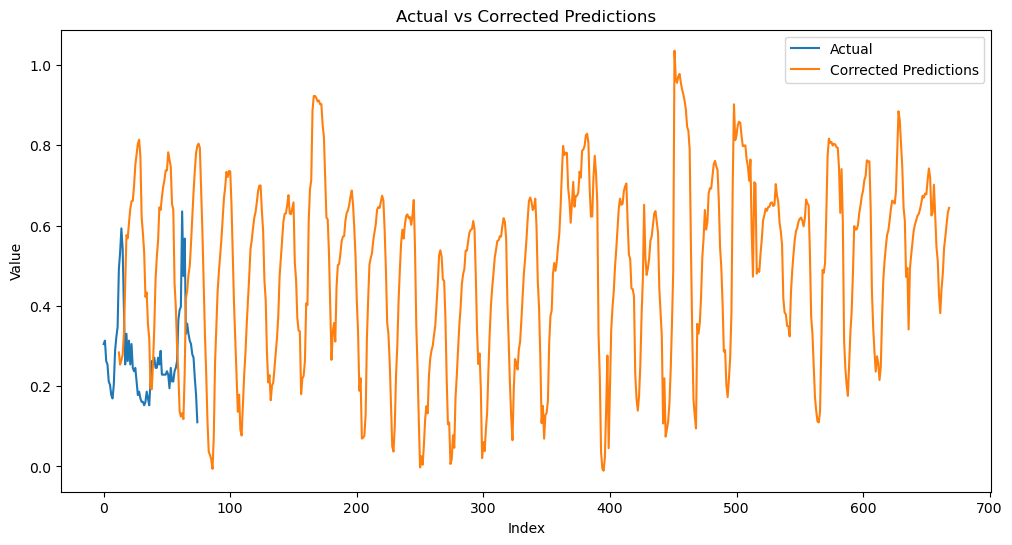

In [29]:
import matplotlib.pyplot as plt

# Ensure df_test is a NumPy array
if isinstance(df_test, torch.Tensor):
    df_test = df_test.cpu().numpy()

# Correct predictions
corrected_predictions = [1 - pred for pred in predicted_train_plot]

plt.figure(figsize=(12, 6))
#plt.plot(range(len(df_test)), df_test[:, 2], label='Actual')
plt.plot(range(len(df_test)), df_test[:, 0], label='Actual')
plt.plot(range(window_size, window_size + len(corrected_predictions)), corrected_predictions, label='Corrected Predictions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Corrected Predictions')
plt.legend()
plt.show()

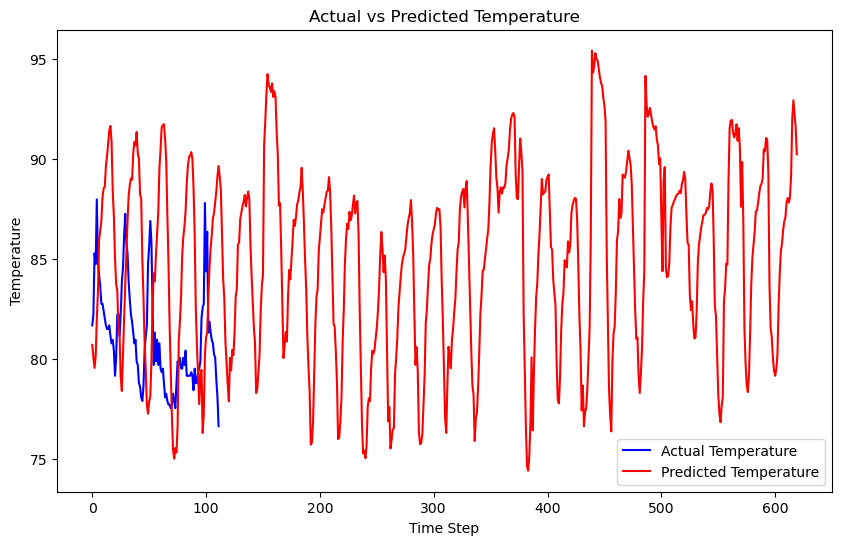

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assume you have:
# - 'scaler' is the MinMaxScaler object used to normalize the data
# - 'predicted_train_plot' is the list of predicted data from your model
# - 'df_test' is the original (scaled) test data

# Convert predictions back to original scale
predictions = np.array(predicted_train_plot).reshape(-1, 1)

# Apply the correction (1 - prediction)
corrected_predictions = 1 - predictions

# Create an empty array with the same shape as df_test (to match the number of features)
df_test_shape = df_test.shape
predictions_full = np.zeros((len(predictions), df_test_shape[1]))

# Fill the temperature column (or the target feature column) with the corrected predictions
# For example, assuming 'Temperature' is the first column (index 0)
predictions_full[:, 0] = corrected_predictions[:, 0]

# Now, inverse transform the data using the scaler
predictions_original = scaler.inverse_transform(predictions_full)

# Extract the predicted temperature (the first column in this case)
predicted_temperature = predictions_original[:, 0]

# Convert test data back to original scale (if needed)
df_test_original = scaler.inverse_transform(df_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the actual values (test data, for temperature only)
plt.plot(df_test_original[:, 0], label='Actual Temperature', color='blue')

# Plot the predicted values (temperature)
plt.plot(predicted_temperature, label='Predicted Temperature', color='red')

plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()